# **This is a collection of the output of the 12 runs**







1/1 [==============================] - 30s 30s/step - loss: 2.1419 - accuracy: 0.4414
Epoch 56/60
196/196 [==============================] - 2809s 14s/step - loss: 2.0634 - accuracy: 0.4459 - val_loss: 2.3024 - val_accuracy: 0.4078
Epoch 57/60
196/196 [==============================] - 2789s 14s/step - loss: 2.0699 - accuracy: 0.4452 - val_loss: 2.3066 - val_accuracy: 0.4092
Epoch 58/60
196/196 [==============================] - 2771s 14s/step - loss: 2.0765 - accuracy: 0.4433 - val_loss: 2.3027 - val_accuracy: 0.4080
Epoch 59/60
196/196 [==============================] - 2771s 14s/step - loss: 2.0814 - accuracy: 0.4413 - val_loss: 2.3134 - val_accuracy: 0.4034
Epoch 60/60
196/196 [==============================] - 2769s 14s/step - loss: 2.0872 - accuracy: 0.4384 - val_loss: 2.3020 - val_accuracy: 0.4098


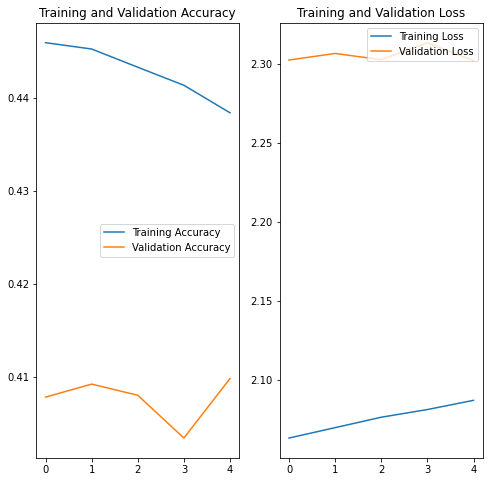

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100/assets


In [ ]:
### Run12
learning_rate = 0.0001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)
#optimizer = tf.optimizers.SGD(learning_rate=learning_rate)


#early_stop = tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor=0.5, patience=5,min_lr=0.00001,verbose=1)
checkpoint_filepath='/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run12-epoch{epoch:02d}-val_loss{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callbacks = [ early_stop, reduce_lr,model_checkpoint_callback]
callbacks = [model_checkpoint_callback]


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### warm up (build the computational graph in order to load the weights and optimizer status)
history = model.fit(train_ds,epochs=1,steps_per_epoch=1)


### Load model weights from last runs
model.load_weights('/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run11-epoch55-val_loss2.29.h5')

### Load optimizer status from last run
import pickle
with open('/content/drive/MyDrive/ColabModels/optimizer_Run11.pkl', 'rb') as f:
    weight_values = pickle.load(f)
model.optimizer.set_weights(weight_values)


### Continue Training based on last run
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=60,
  callbacks=callbacks,
  initial_epoch=55)

actual_number_of_epochs = len(history.history['loss'])
resultPlot(history,actual_number_of_epochs)



### Save Optimizer Status
symbolic_weights = getattr(model.optimizer, 'weights')
weight_values = tf.keras.backend.batch_get_value(symbolic_weights)
with open('/content/drive/MyDrive/ColabModels/optimizer_Run12.pkl', 'wb') as f:
    pickle.dump(weight_values, f)

### save model executables
model.save('/content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100')

1/1 [==============================] - 29s 29s/step - loss: 4.6946 - accuracy: 0.0156
Epoch 53/55
196/196 [==============================] - 3043s 16s/step - loss: 2.0460 - accuracy: 0.4451 - val_loss: 2.2987 - val_accuracy: 0.4108
Epoch 54/55
196/196 [==============================] - 2993s 15s/step - loss: 2.0435 - accuracy: 0.4481 - val_loss: 2.2942 - val_accuracy: 0.4088
Epoch 55/55
196/196 [==============================] - 3014s 15s/step - loss: 2.0514 - accuracy: 0.4471 - val_loss: 2.2901 - val_accuracy: 0.4126


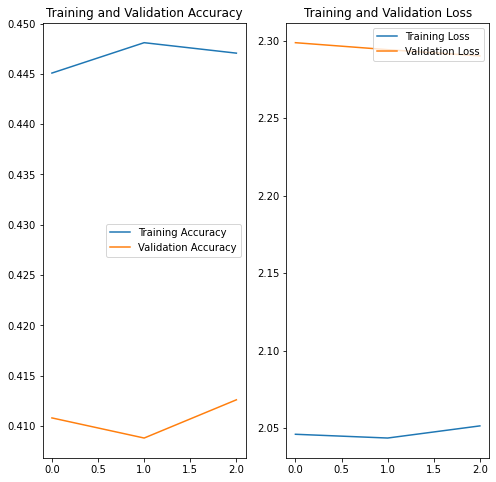

In [ ]:
### Run11
learning_rate = 0.0001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)
#optimizer = tf.optimizers.SGD(learning_rate=learning_rate)


#early_stop = tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor=0.5, patience=5,min_lr=0.00001,verbose=1)
checkpoint_filepath='/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run11-epoch{epoch:02d}-val_loss{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callbacks = [ early_stop, reduce_lr,model_checkpoint_callback]
callbacks = [model_checkpoint_callback]


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### warm up
history = model.fit(train_ds,epochs=1,steps_per_epoch=1)


### Load weights & optimizer status
import pickle
model.load_weights('/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run11-epoch52-val_loss2.31.h5')

with open('/content/drive/MyDrive/ColabModels/optimizer_Run9.pkl', 'rb') as f:
    weight_values = pickle.load(f)
model.optimizer.set_weights(weight_values)


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=55,
  callbacks=callbacks,
  initial_epoch=52)

actual_number_of_epochs = len(history.history['loss'])
resultPlot(history,actual_number_of_epochs)



### Save Optimizer Status
symbolic_weights = getattr(model.optimizer, 'weights')
weight_values = tf.keras.backend.batch_get_value(symbolic_weights)
with open('/content/drive/MyDrive/ColabModels/optimizer_Run11.pkl', 'wb') as f:
    pickle.dump(weight_values, f)

### save model
#model.save('/content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100-Run4')

In [ ]:
Epoch 51/55
196/196 [==============================] - 2216s 11s/step - loss: 2.1092 - accuracy: 0.4332 - val_loss: 2.3336 - val_accuracy: 0.4024
Epoch 52/55
196/196 [==============================] - 2249s 11s/step - loss: 2.0555 - accuracy: 0.4481 - val_loss: 2.3098 - val_accuracy: 0.4048


1/1 [==============================] - 19s 19s/step - loss: 4.6569 - accuracy: 0.0117
Epoch 46/50
196/196 [==============================] - 2081s 11s/step - loss: 2.2556 - accuracy: 0.3998 - val_loss: 2.4485 - val_accuracy: 0.3808
Epoch 47/50
196/196 [==============================] - 2127s 11s/step - loss: 2.2234 - accuracy: 0.4085 - val_loss: 2.4373 - val_accuracy: 0.3822
Epoch 48/50
196/196 [==============================] - 2140s 11s/step - loss: 2.2099 - accuracy: 0.4114 - val_loss: 2.4310 - val_accuracy: 0.3820
Epoch 49/50
196/196 [==============================] - 2201s 11s/step - loss: 2.2042 - accuracy: 0.4140 - val_loss: 2.4261 - val_accuracy: 0.3832
Epoch 50/50
196/196 [==============================] - 2240s 11s/step - loss: 2.1907 - accuracy: 0.4153 - val_loss: 2.4222 - val_accuracy: 0.3832


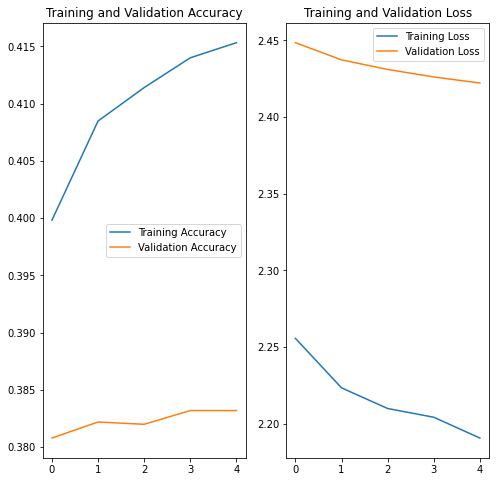

In [ ]:
### Run10
learning_rate = 0.001
weight_decay = 0.0001
#optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)


#early_stop = tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor=0.5, patience=5,min_lr=0.00001,verbose=1)
checkpoint_filepath='/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run10-epoch{epoch:02d}-val_loss{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callbacks = [ early_stop, reduce_lr,model_checkpoint_callback]
callbacks = [model_checkpoint_callback]


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### warm up
history = model.fit(train_ds,epochs=1,steps_per_epoch=1)


### Load weights & optimizer status
import pickle
model.load_weights('/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run8-epoch39-val_loss2.46.h5')

#with open('/content/drive/MyDrive/ColabModels/optimizer_Run8.pkl', 'rb') as f:
#    weight_values = pickle.load(f)
#model.optimizer.set_weights(weight_values)


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50,
  callbacks=callbacks,
  initial_epoch=45)

actual_number_of_epochs = len(history.history['loss'])
resultPlot(history,actual_number_of_epochs)



### Save Optimizer Status
symbolic_weights = getattr(model.optimizer, 'weights')
weight_values = tf.keras.backend.batch_get_value(symbolic_weights)
with open('/content/drive/MyDrive/ColabModels/optimizer_Run10.pkl', 'wb') as f:
    pickle.dump(weight_values, f)

### save model
#model.save('/content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100-Run4')

1/1 [==============================] - 33s 33s/step - loss: 4.6972 - accuracy: 0.0078
Epoch 41/45
196/196 [==============================] - 3082s 16s/step - loss: 2.2814 - accuracy: 0.3926 - val_loss: 2.4870 - val_accuracy: 0.3770
Epoch 42/45
196/196 [==============================] - 3059s 16s/step - loss: 2.2682 - accuracy: 0.3993 - val_loss: 2.4711 - val_accuracy: 0.3712
Epoch 43/45
196/196 [==============================] - 3050s 16s/step - loss: 2.2494 - accuracy: 0.4003 - val_loss: 2.4858 - val_accuracy: 0.3746
Epoch 44/45
196/196 [==============================] - 3060s 16s/step - loss: 2.2299 - accuracy: 0.4037 - val_loss: 2.4460 - val_accuracy: 0.3764
Epoch 45/45
196/196 [==============================] - 3051s 16s/step - loss: 2.2100 - accuracy: 0.4111 - val_loss: 2.4751 - val_accuracy: 0.3758


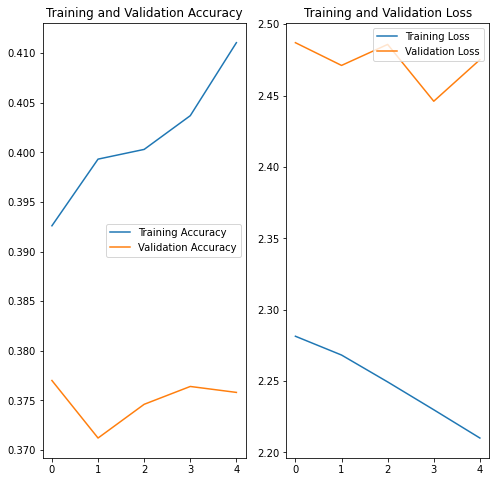

In [ ]:
### Run9
learning_rate = 0.001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)


#early_stop = tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor=0.5, patience=5,min_lr=0.00001,verbose=1)
checkpoint_filepath='/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run9-epoch{epoch:02d}-val_loss{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callbacks = [ early_stop, reduce_lr,model_checkpoint_callback]
callbacks = [model_checkpoint_callback]


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### warm up
history = model.fit(train_ds,epochs=1,steps_per_epoch=1)


### Load weights & optimizer status
import pickle
model.load_weights('/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run8-epoch39-val_loss2.46.h5')

with open('/content/drive/MyDrive/ColabModels/optimizer_Run8.pkl', 'rb') as f:
    weight_values = pickle.load(f)
model.optimizer.set_weights(weight_values)


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=45,
  callbacks=callbacks,
  initial_epoch=40)

actual_number_of_epochs = len(history.history['loss'])
resultPlot(history,actual_number_of_epochs)



### Save Optimizer Status
symbolic_weights = getattr(model.optimizer, 'weights')
weight_values = tf.keras.backend.batch_get_value(symbolic_weights)
with open('/content/drive/MyDrive/ColabModels/optimizer_Run9.pkl', 'wb') as f:
    pickle.dump(weight_values, f)

### save model
#model.save('/content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100-Run4')

In [ ]:
### Run8
Epoch 36/45
196/196 [==============================] - 3358s 17s/step - loss: 2.3401 - accuracy: 0.3846 - val_loss: 2.5120 - val_accuracy: 0.3720
Epoch 37/45
196/196 [==============================] - 3294s 17s/step - loss: 2.3161 - accuracy: 0.3885 - val_loss: 2.5060 - val_accuracy: 0.3710
Epoch 38/45
196/196 [==============================] - 3382s 17s/step - loss: 2.3068 - accuracy: 0.3899 - val_loss: 2.4806 - val_accuracy: 0.3752
Epoch 39/45
196/196 [==============================] - 3337s 17s/step - loss: 2.2782 - accuracy: 0.3953 - val_loss: 2.4649 - val_accuracy: 0.3760
Epoch 40/45
196/196 [==============================] - 3326s 17s/step - loss: 2.2804 - accuracy: 0.3941 - val_loss: 2.5341 - val_accuracy: 0.3632


In [ ]:
### Run7
Epoch 31/35
196/196 [==============================] - 3394s 17s/step - loss: 2.3971 - accuracy: 0.3706 - val_loss: 2.5450 - val_accuracy: 0.3640
Epoch 32/35
196/196 [==============================] - 3082s 16s/step - loss: 2.3778 - accuracy: 0.3761 - val_loss: 2.5737 - val_accuracy: 0.3602
Epoch 33/35
196/196 [==============================] - 3067s 16s/step - loss: 2.3498 - accuracy: 0.3803 - val_loss: 2.4954 - val_accuracy: 0.3732
Epoch 34/35
196/196 [==============================] - 3091s 16s/step - loss: 2.3362 - accuracy: 0.3839 - val_loss: 2.4905 - val_accuracy: 0.3710
Epoch 35/35
196/196 [==============================] - 3407s 17s/step - loss: 2.3145 - accuracy: 0.3903 - val_loss: 2.5392 - val_accuracy: 0.3588

1/1 [==============================] - 29s 29s/step - loss: 4.6800 - accuracy: 0.0078
Epoch 26/30
196/196 [==============================] - 2883s 15s/step - loss: 2.4787 - accuracy: 0.3573 - val_loss: 2.5703 - val_accuracy: 0.3536
Epoch 27/30
196/196 [==============================] - 2897s 15s/step - loss: 2.4436 - accuracy: 0.3629 - val_loss: 2.5524 - val_accuracy: 0.3530
Epoch 28/30
196/196 [==============================] - 2935s 15s/step - loss: 2.4203 - accuracy: 0.3652 - val_loss: 2.5835 - val_accuracy: 0.3514
Epoch 29/30
196/196 [==============================] - 2849s 15s/step - loss: 2.4056 - accuracy: 0.3707 - val_loss: 2.5409 - val_accuracy: 0.3622
Epoch 30/30
196/196 [==============================] - 2816s 14s/step - loss: 2.3823 - accuracy: 0.3765 - val_loss: 2.5155 - val_accuracy: 0.3658


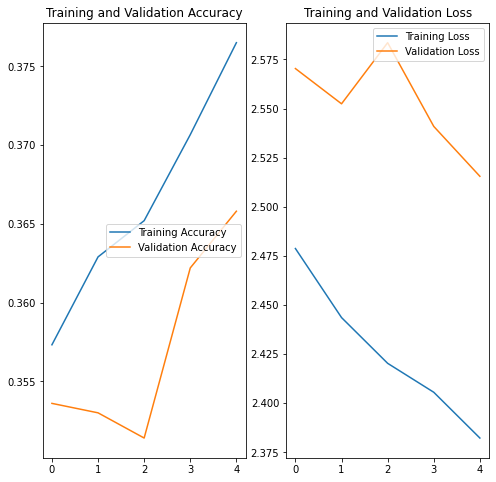

In [ ]:
### Run6
learning_rate = 0.001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)


#early_stop = tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor=0.5, patience=5,min_lr=0.00001,verbose=1)
checkpoint_filepath='/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run6-epoch{epoch:02d}-val_loss{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callbacks = [ early_stop, reduce_lr,model_checkpoint_callback]
callbacks = [model_checkpoint_callback]


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### warm up
history = model.fit(train_ds,epochs=1,steps_per_epoch=1)


### Load weights & optimizer status
import pickle
model.load_weights('/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run5-epoch25-val_loss2.58.h5')

with open('/content/drive/MyDrive/ColabModels/optimizer_Run5.pkl', 'rb') as f:
    weight_values = pickle.load(f)
model.optimizer.set_weights(weight_values)


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30,
  callbacks=callbacks,
  initial_epoch=25)

actual_number_of_epochs = len(history.history['loss'])
resultPlot(history,actual_number_of_epochs)



### Save Optimizer Status
symbolic_weights = getattr(model.optimizer, 'weights')
weight_values = tf.keras.backend.batch_get_value(symbolic_weights)
with open('/content/drive/MyDrive/ColabModels/optimizer_Run6.pkl', 'wb') as f:
    pickle.dump(weight_values, f)

### save model
#model.save('/content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100-Run4')

1/1 [==============================] - 25s 25s/step - loss: 4.6098 - accuracy: 0.0039
Epoch 21/25
196/196 [==============================] - 2543s 13s/step - loss: 2.5810 - accuracy: 0.3304 - val_loss: 2.6550 - val_accuracy: 0.3374
Epoch 22/25
196/196 [==============================] - 2514s 13s/step - loss: 2.5508 - accuracy: 0.3419 - val_loss: 2.6714 - val_accuracy: 0.3260
Epoch 23/25
196/196 [==============================] - 2517s 13s/step - loss: 2.5197 - accuracy: 0.3497 - val_loss: 2.6575 - val_accuracy: 0.3364
Epoch 24/25
196/196 [==============================] - 2513s 13s/step - loss: 2.5032 - accuracy: 0.3534 - val_loss: 2.6754 - val_accuracy: 0.3298
Epoch 25/25
196/196 [==============================] - 2513s 13s/step - loss: 2.4728 - accuracy: 0.3538 - val_loss: 2.5767 - val_accuracy: 0.3376


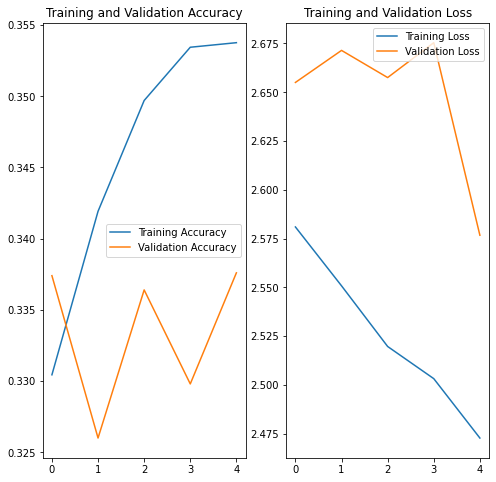

In [ ]:
### Run5
learning_rate = 0.001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)


#early_stop = tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor=0.5, patience=5,min_lr=0.00001,verbose=1)
checkpoint_filepath='/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run5-epoch{epoch:02d}-val_loss{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callbacks = [ early_stop, reduce_lr,model_checkpoint_callback]
callbacks = [model_checkpoint_callback]


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### warm up
history = model.fit(train_ds,epochs=1,steps_per_epoch=1)


### Load weights & optimizer status
import pickle
model.load_weights('/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run4-epoch20-val_loss2.65.h5')

with open('/content/drive/MyDrive/ColabModels/optimizer_Run4.pkl', 'rb') as f:
    weight_values = pickle.load(f)
model.optimizer.set_weights(weight_values)


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25,
  callbacks=callbacks,
  initial_epoch=20)

actual_number_of_epochs = len(history.history['loss'])
resultPlot(history,actual_number_of_epochs)



### Save Optimizer Status
symbolic_weights = getattr(model.optimizer, 'weights')
weight_values = tf.keras.backend.batch_get_value(symbolic_weights)
with open('/content/drive/MyDrive/ColabModels/optimizer_Run5.pkl', 'wb') as f:
    pickle.dump(weight_values, f)

### save model
#model.save('/content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100-Run4')

1/1 [==============================] - 31s 31s/step - loss: 4.6572 - accuracy: 0.0078
Epoch 16/20
196/196 [==============================] - 2950s 15s/step - loss: 2.6905 - accuracy: 0.3114 - val_loss: 2.7388 - val_accuracy: 0.3160
Epoch 17/20
196/196 [==============================] - 2984s 15s/step - loss: 2.6675 - accuracy: 0.3157 - val_loss: 2.7250 - val_accuracy: 0.3212
Epoch 18/20
196/196 [==============================] - 2977s 15s/step - loss: 2.6486 - accuracy: 0.3234 - val_loss: 2.7408 - val_accuracy: 0.3218
Epoch 19/20
196/196 [==============================] - 2971s 15s/step - loss: 2.6002 - accuracy: 0.3274 - val_loss: 2.7026 - val_accuracy: 0.3196
Epoch 20/20
196/196 [==============================] - 2982s 15s/step - loss: 2.5881 - accuracy: 0.3328 - val_loss: 2.6467 - val_accuracy: 0.3342


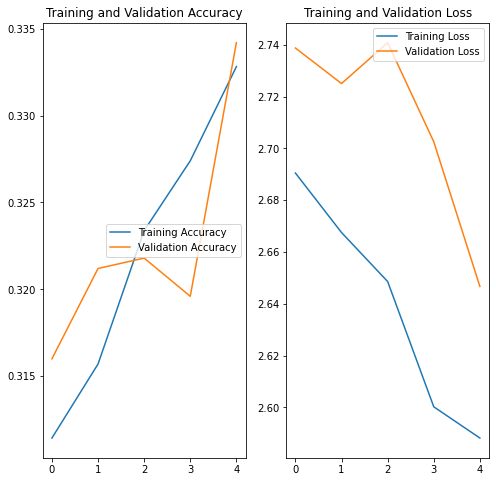

In [ ]:
### Run4
learning_rate = 0.001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)


#early_stop = tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor=0.5, patience=5,min_lr=0.00001,verbose=1)
checkpoint_filepath='/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run4-epoch{epoch:02d}-val_loss{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callbacks = [ early_stop, reduce_lr,model_checkpoint_callback]
callbacks = [model_checkpoint_callback]


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### warm up
history = model.fit(train_ds,epochs=1,steps_per_epoch=1)


### Load weights & optimizer status
import pickle
model.load_weights('/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run3-epoch15-val_loss2.72.h5')

with open('/content/drive/MyDrive/ColabModels/optimizer_Run3.pkl', 'rb') as f:
    weight_values = pickle.load(f)
model.optimizer.set_weights(weight_values)


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks=callbacks,
  initial_epoch=15)

actual_number_of_epochs = len(history.history['loss'])
resultPlot(history,actual_number_of_epochs)



### Save Optimizer Status
symbolic_weights = getattr(model.optimizer, 'weights')
weight_values = tf.keras.backend.batch_get_value(symbolic_weights)
with open('/content/drive/MyDrive/ColabModels/optimizer_Run4.pkl', 'wb') as f:
    pickle.dump(weight_values, f)

### save model
#model.save('/content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100-Run4')

In [ ]:
### Run3
Epoch 11/100
196/196 [==============================] - 2822s 14s/step - loss: 2.9115 - accuracy: 0.2719 - val_loss: 2.8545 - val_accuracy: 0.2910
Epoch 12/100
196/196 [==============================] - 2852s 15s/step - loss: 2.8670 - accuracy: 0.2794 - val_loss: 2.7883 - val_accuracy: 0.3002
Epoch 13/100
196/196 [==============================] - 2900s 15s/step - loss: 2.8157 - accuracy: 0.2863 - val_loss: 2.8082 - val_accuracy: 0.2938
Epoch 14/100
196/196 [==============================] - 2921s 15s/step - loss: 2.7761 - accuracy: 0.2940 - val_loss: 2.7692 - val_accuracy: 0.3030
Epoch 15/100
196/196 [==============================] - 3156s 16s/step - loss: 2.7490 - accuracy: 0.3018 - val_loss: 2.7446 - val_accuracy: 0.3062

Epoch 1/5
196/196 [==============================] - 3043s 15s/step - loss: 3.2339 - accuracy: 0.2134 - val_loss: 3.1126 - val_accuracy: 0.2356
Epoch 2/5
196/196 [==============================] - 2986s 15s/step - loss: 3.1443 - accuracy: 0.2269 - val_loss: 3.0518 - val_accuracy: 0.2462
Epoch 3/5
196/196 [==============================] - 2964s 15s/step - loss: 3.0669 - accuracy: 0.2400 - val_loss: 2.9720 - val_accuracy: 0.2634
Epoch 4/5
196/196 [==============================] - 2979s 15s/step - loss: 3.0063 - accuracy: 0.2521 - val_loss: 2.9610 - val_accuracy: 0.2626
Epoch 5/5
196/196 [==============================] - 3012s 15s/step - loss: 2.9468 - accuracy: 0.2630 - val_loss: 2.9038 - val_accuracy: 0.2844


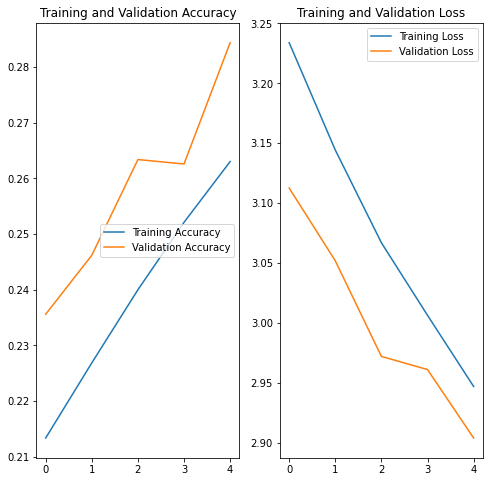

In [ ]:
### Round2
learning_rate = 0.001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)


#early_stop = tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor=0.5, patience=5,min_lr=0.00001,verbose=1)
checkpoint_filepath='/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run2-epoch{epoch:02d}-val_loss{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callbacks = [ early_stop, reduce_lr,model_checkpoint_callback]
callbacks = [model_checkpoint_callback]


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Load weights & optimizer status
import pickle
model.load_weights('/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.Run1-epoch05-val_loss3.14.h5')
#model._make_train_function()
#with open('/content/drive/MyDrive/ColabModels/optimizer_Run1.pkl', 'rb') as f:
#    weight_values = pickle.load(f)
#model.optimizer.set_weights(weight_values)




history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
  callbacks=callbacks)

actual_number_of_epochs = len(history.history['loss'])
resultPlot(history,actual_number_of_epochs)



### Save Optimizer Status
symbolic_weights = getattr(model.optimizer, 'weights')
weight_values = tf.keras.backend.batch_get_value(symbolic_weights)
with open('/content/drive/MyDrive/ColabModels/optimizer_Run2.pkl', 'wb') as f:
    pickle.dump(weight_values, f)

model.save('/content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100-Run2')

In [ ]:
### Round1
learning_rate = 0.001
weight_decay = 0.0001
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)


#early_stop = tf.keras.callbacks.EarlyStopping('val_accuracy', patience=10)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau('val_accuracy', factor=0.5, patience=5,min_lr=0.00001,verbose=1)
checkpoint_filepath='/content/drive/MyDrive/ColabModels/Transformer-CIFAR100.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#callbacks = [ early_stop, reduce_lr,model_checkpoint_callback]
callbacks = [model_checkpoint_callback]


model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model.summary()
utils.plot_model(model, to_file='/content/drive/MyDrive/ColabModels/Transformer_model.png', show_shapes=True, show_layer_names=True)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS,
  callbacks=callbacks
)

actual_number_of_epochs = len(history.history['loss'])
resultPlot(history,actual_number_of_epochs)

#model.save('/content/drive/MyDrive/ColabModels/Transformer-Model-CIFAR100',save_format='h5')

Epoch 1/100
196/196 [==============================] - 3434s 17s/step - loss: 4.2036 - accuracy: 0.0551 - val_loss: 3.8463 - val_accuracy: 0.1104
Epoch 2/100
196/196 [==============================] - 3417s 17s/step - loss: 3.7808 - accuracy: 0.1132 - val_loss: 3.5181 - val_accuracy: 0.1644
Epoch 3/100
196/196 [==============================] - 3394s 17s/step - loss: 3.5798 - accuracy: 0.1466 - val_loss: 3.3788 - val_accuracy: 0.1876
Epoch 4/100
196/196 [==============================] - 3327s 17s/step - loss: 3.4090 - accuracy: 0.1770 - val_loss: 3.2286 - val_accuracy: 0.2194
Epoch 5/100
196/196 [==============================] - 3298s 17s/step - loss: 3.3006 - accuracy: 0.1970 - val_loss: 3.1434 - val_accuracy: 0.2244
Epoch 6/100
 86/196 [============>.................] - ETA: 30:32 - loss: 3.2467 - accuracy: 0.2064